<a href="https://colab.research.google.com/github/cantaruttim/Finances/blob/main/Carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from datetime import date
import sys

In [ ]:
acoes = ['B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'CMIG4.SA', 'GGBR4.SA', 'ITSA4.SA', 'PETR4.SA', 'TAEE11.SA']
data_atual = date.today()

dataset = yf.download(acoes, start='2020-04-04',end=data_atual)['Close']
dataset

[*********************100%%**********************]  8 of 8 completed


,B3SA3.SA,BBAS3.SA,BBDC3.SA,CMIG4.SA,GGBR4.SA,ITSA4.SA,PETR4.SA,TAEE11.SA
Date,,,,,,,,
2020-04-06,12.403333,27.860001,14.620586,5.632580,9.238095,7.541125,15.770000,27.100000
2020-04-07,12.833333,29.170000,15.432006,5.745232,9.828571,7.766233,16.400000,27.000000
2020-04-08,13.103333,29.730000,15.709992,5.877763,10.523809,8.069264,17.320000,27.040001
2020-04-09,13.003333,29.650000,15.537190,6.076560,10.190476,8.000000,16.820000,26.900000
2020-04-13,13.113333,30.240000,15.957926,6.281983,10.695238,8.216450,16.930000,27.000000
...,...,...,...,...,...,...,...,...
2023-09-11,12.910000,47.380001,12.980000,12.390000,25.549999,9.230000,33.369999,34.700001
2023-09-12,13.160000,47.299999,13.110000,12.510000,25.730000,9.270000,33.529999,34.779999
2023-09-13,13.210000,47.259998,13.150000,12.570000,25.360001,9.270000,33.029999,34.779999


In [ ]:
dataset.to_csv('acoes.csv')

In [ ]:
dataset

,B3SA3.SA,BBAS3.SA,BBDC3.SA,CMIG4.SA,GGBR4.SA,ITSA4.SA,PETR4.SA,TAEE11.SA
Date,,,,,,,,
2023-04-04,10.83,39.290001,11.74,11.67,24.780001,8.15,24.270000,35.180000
2023-04-05,10.79,39.150002,11.76,11.69,24.040001,8.13,24.350000,35.180000
2023-04-06,10.70,39.020000,11.65,11.69,23.940001,8.12,24.000000,35.049999
2023-04-10,10.91,39.040001,11.71,11.87,24.610001,8.15,24.510000,33.950001
2023-04-11,11.63,39.939999,12.19,12.08,25.920000,8.42,25.660000,33.939999
...,...,...,...,...,...,...,...,...
2023-09-11,12.91,47.380001,12.98,12.39,25.549999,9.23,33.369999,34.700001
2023-09-12,13.16,47.299999,13.11,12.51,25.730000,9.27,33.529999,34.779999
2023-09-13,13.21,47.259998,13.15,12.57,25.360001,9.27,33.029999,34.779999


In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()


  colunas = dataset.columns[1:]
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 100, 10);

<ipython-input-72-8421e584ef6d>:20: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
def evolucao_acoes(dataset, datas):

  figura = px.line(title = "Evolução do Patrimônio")
  for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
    figura.add_scatter(x = datas, y = dataset[i], name = i)
    figura.update_layout(hovermode="x")

  return figura.show()

evolucao_acoes(dataset, datas)

In [ ]:
def evolucao_patrimonio_investido(dataset, datas):

  figura = px.line(x = datas,
                  y = dataset['soma valor'],
                  title = 'Evolução do Patrimônio')
  return figura.show()

evolucao_patrimonio_investido(dataset, datas)

## Sharpe Ratio

In [ ]:
taxa_selic_historico  = np.array([2.00, 9,25, 13,75, 11.75])

In [ ]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
  dataset = dataset.copy()
  dataset_original = dataset.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - sys.maxsize
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0

  for _ in range(repeticoes):
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in dataset.columns[1:]:
      dataset[i] = dataset[i] / dataset[i][0]

    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels = ['Date'], axis = 1, inplace=True)

    retorno_carteira = np.log(dataset / dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)

    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [ ]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'),
                                                                                                                                     100,
                                                                                                                                     taxa_selic_historico.mean() / 100,
                                                                                                                                     5000)

In [ ]:
sharpe_ratio

0.004534257612814219

In [ ]:
melhores_pesos

array([0.00410737, 0.01481854, 0.05192176, 0.24528421, 0.32570796,
       0.01764482, 0.23900714, 0.10150821])

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

<ipython-input-72-8421e584ef6d>:20: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
acoes_pesos, soma_valor

(       Ações      Pesos
 0   B3SA3.SA   0.410737
 1   BBAS3.SA   1.481854
 2   BBDC3.SA   5.192176
 3   CMIG4.SA  24.528421
 4   GGBR4.SA  32.570796
 5   ITSA4.SA   1.764482
 6   PETR4.SA  23.900714
 7  TAEE11.SA  10.150821,
 11051.727952732243)

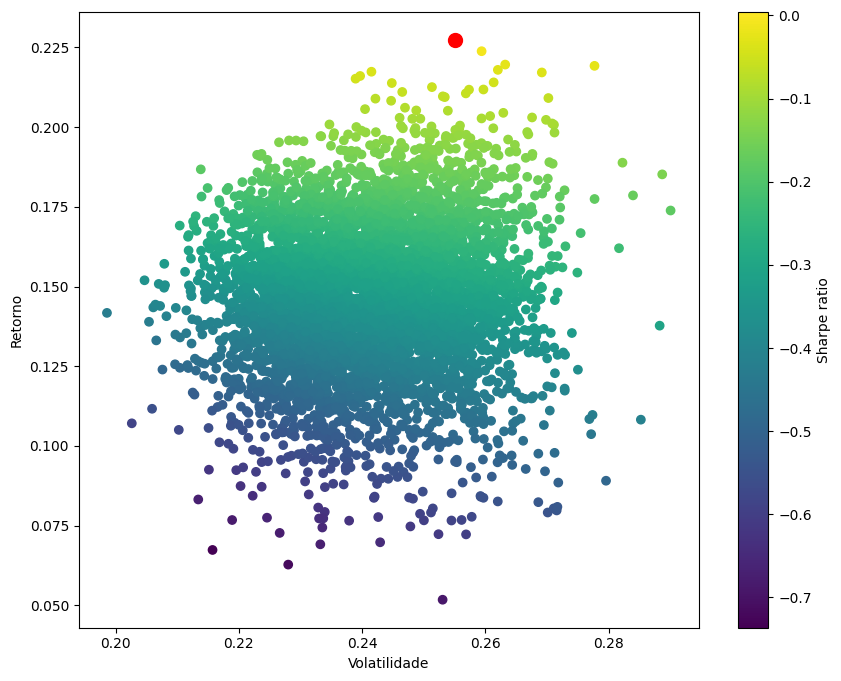

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);

## Otimização de portfólio com algoritmos de otimização

- Biblioteca mlrose: https://mlrose.readthedocs.io/en/stable/

In [ ]:
!pip install mlrose

  Using cached mlrose-1.3.0-py3-none-any.whl (27 kB)
  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=22e67150179948563a8f608a35d2053c273ec6974122b7a0ab617f9d37f4d077
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


In [ ]:
!pip install scikit-learn==0.22

  Using cached scikit-learn-0.22.tar.gz (6.9 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [ ]:
import mlrose

ImportError: ignored

In [ ]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [ ]:
def fitness_function(solucao):
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum()

  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels = ['Date'], axis = 1, inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio

In [ ]:
fitness_function(pesos)

NameError: ignored

In [ ]:
def visualiza_alocacao(solucao):
  colunas = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(colunas[i], solucao[i] * 100)

In [ ]:
visualiza_alocacao(pesos)

NameError: ignored